In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import sys
np.set_printoptions(threshold=sys.maxsize)

# Data Collection

In [2]:
data = pd.read_csv("housing.csv")
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [3]:
# Checking missing values
data.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

# Data Analyze and Visualize

In [4]:
data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


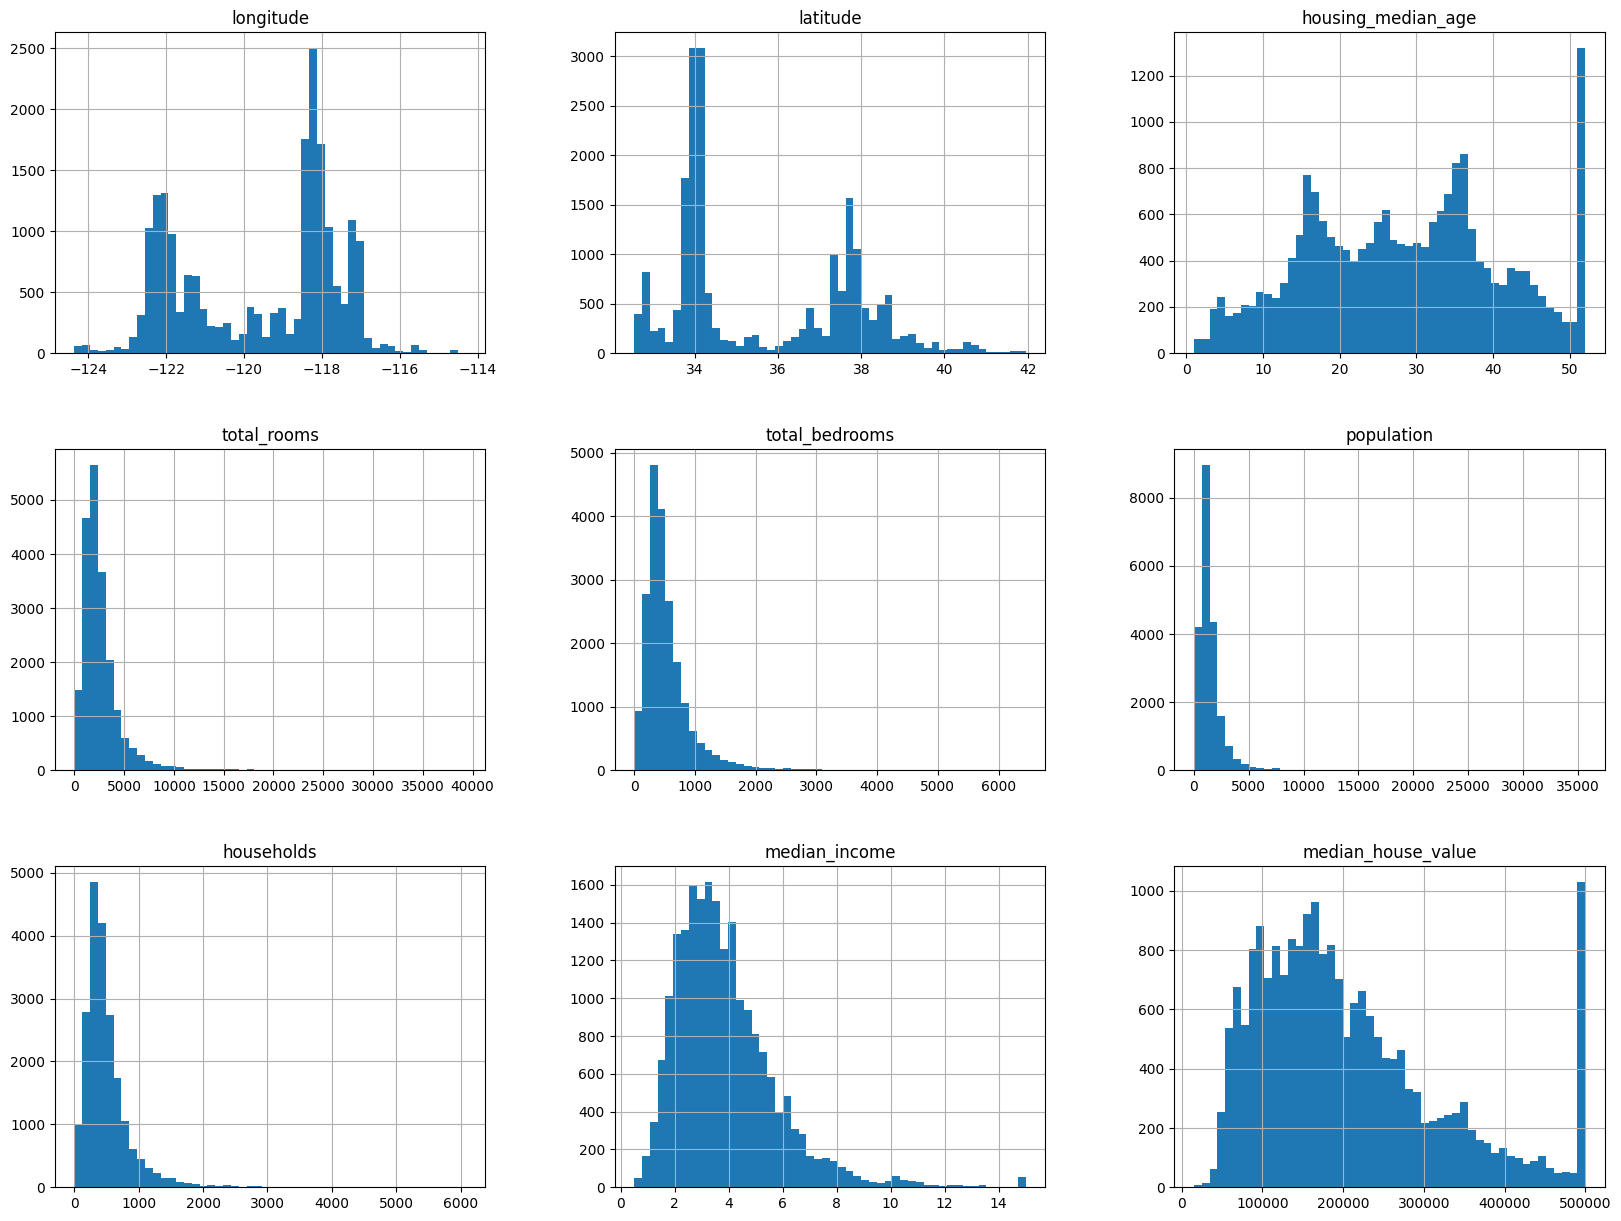

In [5]:
#creating plots on dataset
%matplotlib inline
data.hist(bins=50,figsize=(20,15))
plt.show()

From the above histograms, you can observe that there are not many outliers present in the data. Let's confirm it with box plot, best representation for outliers.

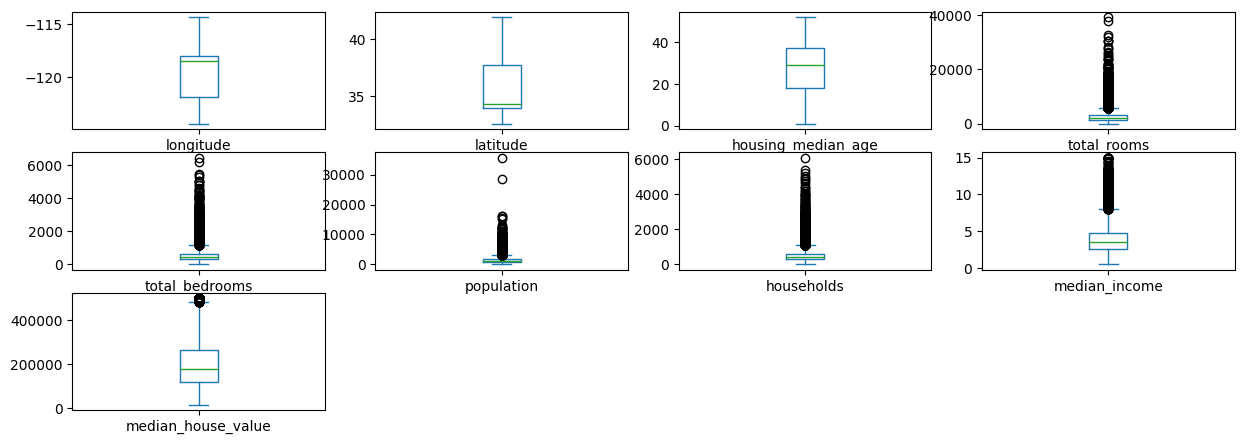

In [6]:
data.plot(kind='box', subplots=True, layout=(4,4), figsize=(15,7))
plt.show()

From box plots we can see outliers present in total_rooms, total_bedrooms, population, households, median_income

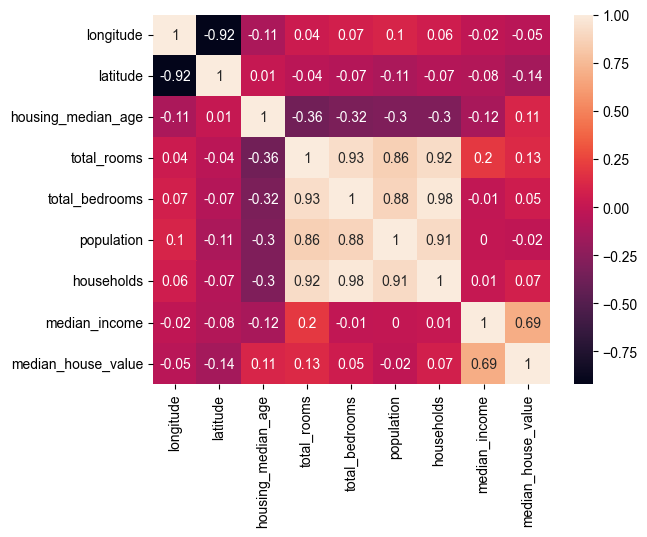

In [7]:
import seaborn as sns
corr = data.loc[:].corr() # Exclude id column in correlation computation
sns.heatmap(corr.round(2),annot=True)
sns.set(rc={"figure.figsize":(5, 5)})
plt.show()

House values are significantly correlated with median income. <br>

From above heat map we can observe the correlation between features, there are many features with high correlation. <br>

medain_house_price has high correlation with median_income.<br>

total_bedrooms has high correlation with total_rooms, population, households. So, any of them can be used to fill the missing values

# Data Wrangling

In [8]:
# Fixing the missing values of total bedroom, using the correlation between it and total_rooms

from sklearn.impute import KNNImputer
X = data[['total_rooms','total_bedrooms']].copy()
imputer = KNNImputer(n_neighbors=3)
X =imputer.fit_transform(X)

In [9]:
print(np.isnan(X).sum())# Check if all missing values have been filled.

0


In [10]:
#Replace missing values in the dataframe
data['total_bedrooms']=X[:,1]

In [11]:
data.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

Treating the outliers

In [12]:
data=data[data['total_rooms']<data['total_rooms'].quantile(0.9)]
data=data[data['total_bedrooms']<data['total_bedrooms'].quantile(0.9)]
data=data[data['population']<data['population'].quantile(0.9)]
data=data[data['households']<data['households'].quantile(0.9)]
data=data[data['median_income']<data['median_income'].quantile(0.9)]

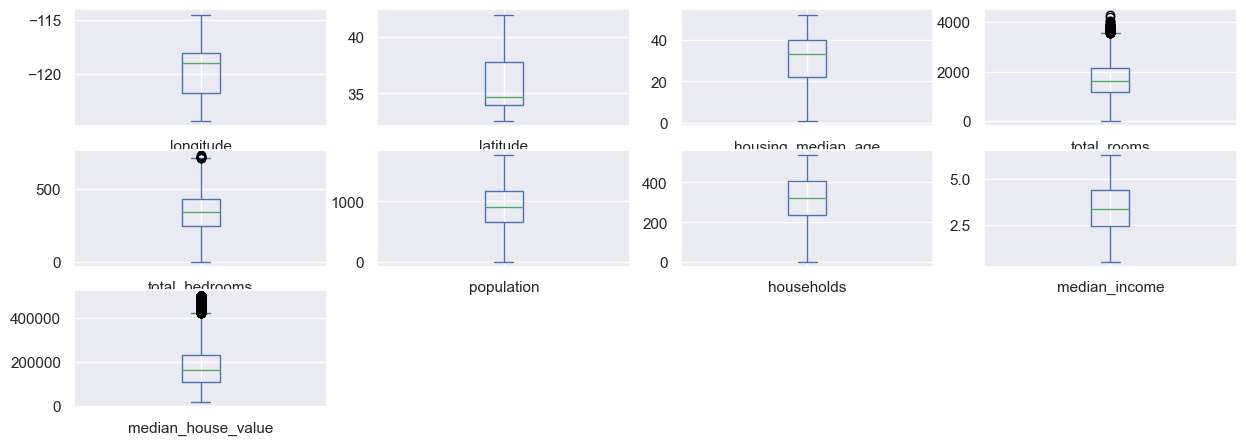

In [13]:
data.plot(kind='box', subplots=True, layout=(4,4), figsize=(15,7))
plt.show()

In [14]:
# Making the categorical variable ocean_proximity to numerical using label encoder

from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
housing_cat = data["ocean_proximity"]
housing_cat_encoded = encoder.fit_transform(housing_cat)
housing_cat_encoded[0:20]

array([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3])

In [15]:
encoder.classes_

array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
      dtype=object)

In [16]:
data["ocean_proximity"] = housing_cat_encoded

In [17]:
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,3
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,3
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,3
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,3
10,-122.26,37.85,52.0,2202.0,434.0,910.0,402.0,3.2031,281500.0,3
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,1
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,1
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,1
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,1


# Train Test Split

In [18]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, recall_score, roc_auc_score, precision_score, f1_score

In [19]:
X  = data[['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'ocean_proximity']]
y = data['median_house_value']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=0)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(8513, 9) (3649, 9) (8513,) (3649,)


In [20]:
# Scaling the data
scaler = StandardScaler().fit(X_train)
X_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Modeling

1. Linear Regression

In [21]:
# Creating and fitting linear regerssion model
model = LinearRegression()
model.fit(X_scaled , y_train)

LinearRegression()

In [22]:
# Training score of the model
model.score(X_scaled, y_train)

0.5591309913062751

In [23]:
model.score(X_test_scaled, y_test)

0.559688976346665

In [24]:
y_pred1 = model.predict(X_test_scaled)
data1 = pd.DataFrame({"Y_test": y_test , "Y_pred1" : y_pred1})
data1.head(10)

,Y_test,Y_pred1
9256,52300.0,31608.378347
13647,69900.0,92081.047558
6850,234400.0,203951.330722
748,158300.0,160780.641717
15968,238000.0,171695.099871
10645,500001.0,349956.527496
4221,209100.0,185374.684509
7003,172800.0,190788.655261
19300,260300.0,178382.193029
1544,275000.0,271006.007196


In [25]:
x = [i for i in range(len(data1))]
data1['x'] = x
data1

,Y_test,Y_pred1,x
9256,52300.0,31608.378347,0
13647,69900.0,92081.047558,1
6850,234400.0,203951.330722,2
748,158300.0,160780.641717,3
15968,238000.0,171695.099871,4
...,...,...,...
1870,91300.0,53328.615009,3644
8937,470800.0,308246.815299,3645
17374,136900.0,171237.268053,3646
7548,155600.0,161399.518518,3647


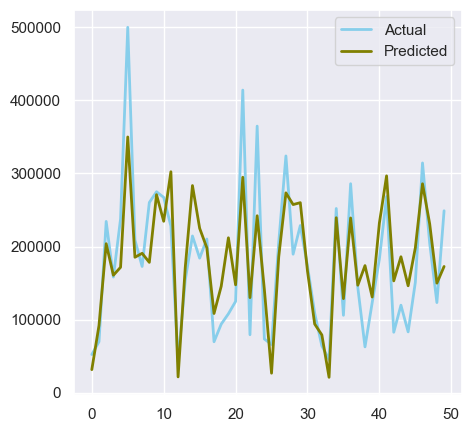

In [26]:
plt.figure(figsize=(5, 5))
plt.plot('x', 'Y_test', data=data1[0:50], color='skyblue', linewidth=2)
plt.plot('x', 'Y_pred1', data=data1[0:50], color='olive', linewidth=2)
plt.legend(["Actual", "Predicted"])
plt.show()

2. SVR

In [27]:
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [28]:
SVR_model = make_pipeline( StandardScaler(), SVR(epsilon=3, kernel='linear', C=100))

In [29]:
SVR_model.fit(X_scaled, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svr', SVR(C=100, epsilon=3, kernel='linear'))])

In [30]:
y_pred_svm = SVR_model.predict(X_test_scaled)

In [31]:
data2 = pd.DataFrame({"Y_test": y_test , "Y_pred1" : y_pred_svm})
data2.head(10)

,Y_test,Y_pred1
9256,52300.0,55364.818007
13647,69900.0,106502.558572
6850,234400.0,188249.849166
748,158300.0,136561.513159
15968,238000.0,160082.859739
10645,500001.0,299967.965921
4221,209100.0,172496.078767
7003,172800.0,186690.746047
19300,260300.0,138077.699420
1544,275000.0,253383.328343


In [32]:
eval_score = r2_score(y_test, y_pred_svm)
eval_score

0.48283831151202283

In [33]:
x = [i for i in range(len(data2))]
data2['x'] = x

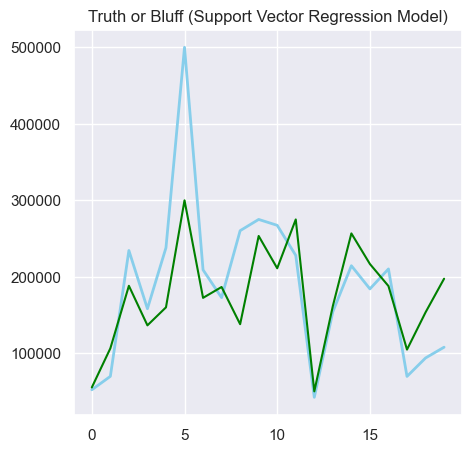

In [34]:
plt.plot('x', 'Y_test', data=data2[0:20], color='skyblue', linewidth=2)
plt.plot('x', 'Y_pred1', data=data2[0:20], color='green')
# plt.plot(X, regressor.predict(X), color = 'green')
plt.title('Truth or Bluff (Support Vector Regression Model)')
plt.show()

# Comparision

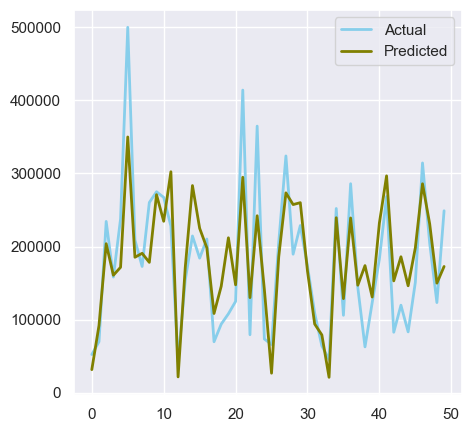

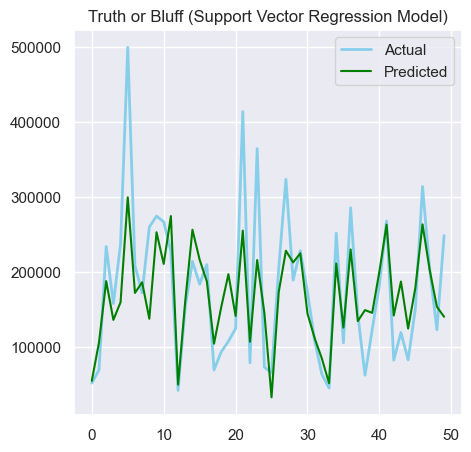

In [35]:
plt.figure(figsize=(5, 5))
plt.plot('x', 'Y_test', data=data1[0:50], color='skyblue', linewidth=2)
plt.plot('x', 'Y_pred1', data=data1[0:50], color='olive', linewidth=2)
plt.legend(["Actual", "Predicted"])
plt.show()

plt.plot('x', 'Y_test', data=data2[0:50], color='skyblue', linewidth=2)
plt.plot('x', 'Y_pred1', data=data2[0:50], color='green')
# plt.plot(X, regressor.predict(X), color = 'green')
plt.title('Truth or Bluff (Support Vector Regression Model)')
plt.legend(["Actual", "Predicted"])
plt.show()

From the two comparisions of predicted median price almost both the models are performing similar with r2 score of 0.55 and 0.48 for LR and SVM. LR is slightly better than SVM with current parameter configuration.